<center> <H1> Testing H1: MRGs are positioned within mitochondria </H1> </center>



                        *Code written by Timo Rey. Laboratory of Experimental Biophysics, EPFL*

                                            *Created for revisions in 2019/20*

#### Aims:
    To test whether mitochondrial RNA granules are spaced randomly along the mitochondria and their network or not.
    Work-flow inspired by R. Jajoo et al., Science 351, 2016

#### H0:
    MRGs-distribution along the mitochondrial network is identical with a random-distribution.
    
#### Approach:
    1) Simulate a random distribution of granules along the mitochondrial network, constrained by:
        a) length of observed mitochondria
        b) number of granules in these mitochondria
    2) Test whether observed values are drawn from the simulated distribution (Kolmogorov-Smirnov test). Observed values are:
        a) observed MRG positions.
        b) observed distances between MRGs, when 2 or more granules were found within a mitochondrion.
    3) Reject H0, and accept H1 if p-value << 0.05.

#### Use of script:
    1) Specify the location of the input data & an output-directory.
    Requirements:
       INPUT: .csv files of particles generated by MicrobeJ.
       Functions from class-file & functions-file in the same directory as this jupyter notebook.
    2) Run all the cells.
    3) Inspect Results & draw conclusions.

# Your input is required here:

In [2]:
# Specify the intput-directory containing all sub-directories and files with observation-data:
input_directory   = 'C:/Users/Public/Documents/05_Distribution/03_MicrobeJ_data/'

# Specify output-directory (default is the same as this note-book runs in):
outDir            = 'C:/Users/Public/Documents/05_Distribution/04_Analysis/'

# Run cells below:
(click "Run" *or* hit "shift + enter" for each cell)

## 1) Load observations

In [3]:
# Import classes & functions:
%run ./MRGdistribution_Classes.ipynb
%run ./MRGdistribution_Functions.ipynb

In [4]:
# Extract relevant experimental data:
observationsWith0 = RelevantObservations(['_Mito', '_MRGs'],withMRGs = False)    # give distinct key-words present in the names of the data-files.
observations      = RelevantObservations(['_Mito', '_MRGs'])                     # default include only mitochondria WITH MRGs

Correlation Coefficient between mitochondrial Length and # MRGs =  0.6200254675382726


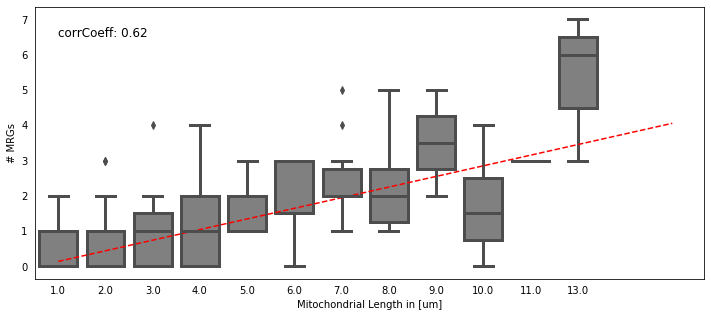

In [5]:
CorrelationFigure = plotCorr(observationsWith0)
plt.savefig(outDir +"Corr"+'Length'+"VsMRGs.svg")

In [6]:
# Find average mitochondrial length per granule
observed = observations
observed["space"] = observed["Length"]/observed["Particles"]
observed["frequency"] = observed["Particles"]/observed["Length"]

print("\nWe expect to find an MRG every "+str(observed["space"].median())+" +/- "+str(observed["space"].std())+""" um of mitochondrial length. 
      (n="""+str(len(observed["space"]))+" mitochondria with > 0 granules)")

print("\nWe expect to find about "+str(observed["frequency"].median())+" +/- "+str(observed["frequency"].std())+" MRGs per um of mitochondria.")


We expect to find an MRG every 2.002988 +/- 1.6545118898234734 um of mitochondrial length. 
      (n=131 mitochondria with > 0 granules)

We expect to find about 0.4992541143531563 +/- 0.3903835314863309 MRGs per um of mitochondria.


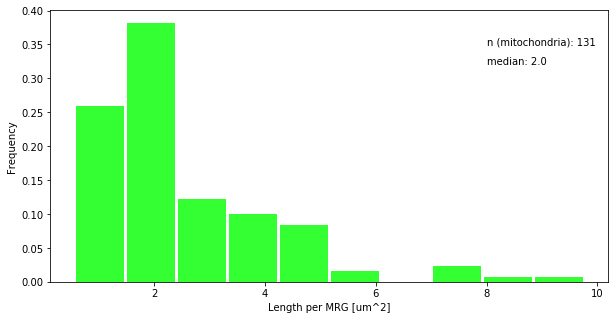

In [7]:
weight = np.ones_like(observed["space"])/float(len(observed["space"]))
N = len(observed["space"])

# plot distributions:
fig, ax = plt.subplots(figsize = (10,5))

plt.hist(observed["space"], rwidth= 0.95, color="lime", alpha= 0.8, weights = weight)

ax.set(xlabel = "Length per MRG [um^2]", ylabel = "Frequency")
ax.text(8,0.35,"n (mitochondria): "+str(N))
ax.text(8,0.32,"median: "+str(round(observed["space"].median(),2)))

plt.savefig(outDir +"LengthPerMRG.svg")

## 2) Simulate random distribution

In [8]:
# Create simulated-objects for each observed mitochondrion:
simulated_mito    = simulation_creator(observations)
len(simulated_mito)

131

In [9]:
# define min & max to include mitochondria containing more (than MIN) or less (than MAX) particles.
MIN = 1
MAX = 10

In [10]:
# Simulate granules with randomly drawn positions:
for i in range(len(observations)):                         # for every observed mitochondrion,

    simulated_mito[i].run_simulation(iterations = 1000)     # specify 'iterations' or use default number (=200).
    simulated_mito[i].normalise_positions()                # generate normalised positions.

    if simulated_mito[i].Particles > MIN:                    # for mitochondria with more than 1,    
        if simulated_mito[i].Particles < MAX:                # but less than 4 particles,
            simulated_mito[i].particle_distances()         # compute distances between particles.

In [11]:
# Visualise particular simulated data:
#id = 9                                                    # define which simulated mitochondrial 'id' to show.
#simulated_mito[id].plot_distribution()                    # show histogram of all simulated absolute positions (=default 'data_type'), or 'normalised', or 'distances'
#simulated_mito[id].show_example()                        # show random (=default) or particular simulated mitochondrion.

## 2) Test whether observed values are drawn from the simulated distribution

In [12]:
# Create observed-objects alike simulated objects:
observed_mito = observation_creator(observations)

In [13]:
aList = []
for i in range (len(observed_mito)):
    if observed_mito[i].Particles > MIN:
        if observed_mito[i].Particles < MAX: 
            aList.append(observed_mito[i].Particles)
            
print("number of analysed mitochondria with more than "+str(MIN)+" granules: \n\t" + str(len(aList)))

number of analysed mitochondria with more than 1 granules: 
	60


In [14]:
# Calculate relevant observables:
for i in range(len(observations)):                          # for every observed mitochondrion,
    observed_mito[i].normalise_positions()                  # generate normalised positions.

    if observed_mito[i].Particles > MIN:                    # for mitochondria with more than 1,    
        if observed_mito[i].Particles < MAX:                # but less than 4 particles,
#            if observed_mito[i].Box[0] < 5                 # mitochondrial length-cutOff
            observed_mito[i].particle_distances()           # compute distances between particles.
            observed_mito[i].particle_NN()                  # find NN-distance for every particle

In [15]:
#observed_mito[5].distances

## Are distances between MRGs drawn from a random distribution? 

In [16]:
# Make a list with all the data:
simulated_data = []
observed_data  = []
for ID in range(len(observations)):
    simulated_data.append(simulated_mito[ID].distances)
    observed_data.append(observed_mito[ID].distances)

# resolve nestled lists:
merging1 = list(itertools.chain(*simulated_data))
merging2 = list(itertools.chain(*observed_data))
merged_sim = list(itertools.chain(*merging1))
merged_obs = list(itertools.chain(*merging2))

In [17]:
# number of pairs:
n = len(merged_obs)
# Kolmogorov-Smirnov test:
p = round(stats.ks_2samp(merged_sim, merged_obs)[1], 5)

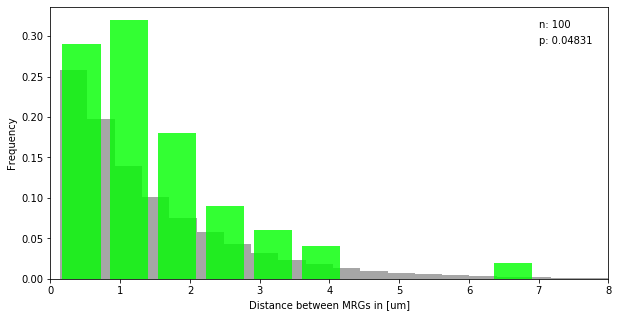

In [18]:
weights = np.ones_like(merged_obs)/float(len(merged_obs))
weights2 = np.ones_like(merged_sim)/float(len(merged_sim))

# plot distributions:
fig, ax = plt.subplots(figsize = (10,5))

#plt.hist(merged_sim, color="grey", bins = 10, rwidth= 1, alpha= 0.7)
plt.hist(merged_sim, color="grey", bins = 30, rwidth= 1.0, alpha= 0.7, weights = weights2 )
plt.hist(merged_obs, color="lime", bins = 10, rwidth= 0.8, alpha= 0.8, weights = weights )

ax.set_xlim(0,8)
ax.set(xlabel = "Distance between MRGs in [um]", ylabel = "Frequency")
ax.text(7,0.31,"n: "+str(n))
ax.text(7,0.29,"p: "+str(p))

plt.savefig(outDir +"NN_random_Min"+str(MIN)+"_Max"+str(MAX)+"prob.svg")

## Are normalised positions drawn from a random distribution?

In [19]:
print("number of analysed mitochondria with at least 1 granule: " + str(len(observations[observations["Particles"]>0])))

number of analysed mitochondria with at least 1 granule: 131


In [20]:
# Make a list with all the data:
simulated_pos = []
observed_pos  = []
for ID in range(len(observations)):
    simulated_pos.append(simulated_mito[ID].norm_positions)
    observed_pos.append(observed_mito[ID].norm_positions)

# resolve nestled lists:
merging11   = list(itertools.chain(*simulated_pos))
m_obsPos    = list(itertools.chain(*observed_pos))
m_simPos    = list(itertools.chain(*merging11))

In [21]:
# number of granules:
n2 = len(m_obsPos)
# Kolmogorov-Smirnov test:
p2 = round(stats.ks_2samp(m_simPos, m_obsPos)[1], 5)

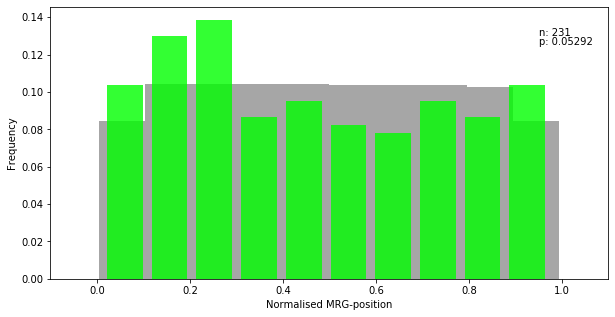

In [22]:
weights = np.ones_like(m_obsPos)/float(len(m_obsPos))
weights2 = np.ones_like(m_simPos)/float(len(m_simPos))

# plot distributions:
fig, ax = plt.subplots(figsize = (10,5))

#plt.hist(merged_sim, color="grey", bins = 10, rwidth= 1, alpha= 0.7)
plt.hist(m_simPos, color="grey", bins = 10, rwidth= 1.0, alpha= 0.7, weights = weights2 )
plt.hist(m_obsPos, color="lime", bins = 10, rwidth= 0.8, alpha= 0.8, weights = weights )

ax.set_xlim(-0.1,1.1)
ax.set(xlabel = "Normalised MRG-position", ylabel = "Frequency")
ax.text(0.95,0.13,"n: "+str(n2))
ax.text(0.95,0.125,"p: "+str(p2))

plt.savefig(outDir +"normPos_random_Min"+str(MIN)+"_Max"+str(MAX)+"prob.svg")

## Are absolute positions drawn from a random distribution?

In [23]:
# Make a list with all the data:
simulated_absPos = []
observed_absPos  = []
for ID in range(len(observations)):
    simulated_absPos.append(simulated_mito[ID].all_runs)
    observed_absPos.append(observed_mito[ID].Positions)

merging12 = list(itertools.chain(*simulated_absPos))
absPos_obs = list(itertools.chain(*observed_absPos))
absPos_sim = list(itertools.chain(*merging12))

In [24]:
# number of granules:
n3 = len(m_obsPos)
# Kolmogorov-Smirnov test:
p3 = round(stats.ks_2samp(absPos_sim, absPos_obs)[1], 5)

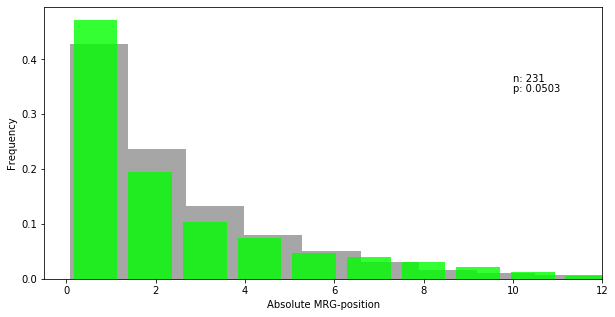

In [25]:
weights = np.ones_like(absPos_obs)/float(len(absPos_obs))
weights2 = np.ones_like(absPos_sim)/float(len(absPos_sim))

# plot distributions:
fig, ax = plt.subplots(figsize = (10,5))

#plt.hist(merged_sim, color="grey", bins = 10, rwidth= 1, alpha= 0.7)
plt.hist(absPos_sim, color="grey", bins = 10, rwidth= 1.0, alpha= 0.7, weights = weights2 )
plt.hist(absPos_obs, color="lime", bins = 10, rwidth= 0.8, alpha= 0.8, weights = weights )

ax.set_xlim(-0.5,12)
ax.set(xlabel = "Absolute MRG-position", ylabel = "Frequency")
ax.text(10,0.36,"n: "+str(n3))
ax.text(10,0.34,"p: "+str(p3))

plt.savefig(outDir +"absPos_random_Min"+str(MIN)+"_Max"+str(MAX)+"prob.svg")